In [111]:
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
 
import os
import pandas as pd
import numpy as np
a = [name for name in os.listdir(".") if os.path.isdir(name)]
d = pd.DataFrame()
for i in a:
    if i != '.git' or i!= 'Test':
        b = os.listdir(i)
        b = np.array(b)
        c = pd.DataFrame(b, columns=['filename'])
        c['Class'] = i
        #append to the master dataframe
        d = d.append(c)

from pathlib import Path


df = d
df.head()

# Construct file path by concatenating fold and file name
df['relative_path'] = df['Class'] + '/' + df['filename'].astype(str)
df = df.sample(frac=1)
label_encoder = preprocessing.LabelEncoder()

df['classID'] = label_encoder.fit_transform(df['Class'])

# Take relevant columns
df = df[['relative_path', 'classID','Class']]
df.head()
df.to_csv('train.csv', index=False)



In [112]:
df

,relative_path,classID,Class
74,Whispering/1y29-ZH39tg_30.wav,17,Whispering
288,Whispering/CqV46dCxZ6Y_170.wav,17,Whispering
76,shatter/Mk8ZlhFe3hs_2.wav,20,shatter
153,Whimper/0ifCQo6t_zQ_30.wav,16,Whimper
260,Speech/--PR7JgHw3Q_15.wav,13,Speech
...,...,...,...
347,Whispering/Fl_v0-faJT4_30.wav,17,Whispering
514,Snicker/MdXPRpM5g58_1.wav,12,Snicker
25,"Wail, moan/JxsHcmGgenI_30.wav",15,"Wail, moan"
866,Whimper/6mRtm9hE304_30.wav,16,Whimper


In [113]:
df.Class.unique()

array(['Whispering', 'shatter', 'Whimper', 'Speech', 'Children shouting',
       'Snicker', 'Screaming', 'Singing', 'Conversation', 'Groan',
       'Babbling', 'Whoop', 'Clapping', 'Breathing', 'Wail, moan',
       'Bellow', 'Battle cry', 'Yell', 'Finger snapping', '.git', 'Test'],
      dtype=object)

In [114]:
df.shape

(7352, 3)

In [115]:
df= df[df['Class'] != 'Test']

In [116]:
df.shape

(7350, 3)

In [117]:
df= df[df['Class'] != '.git']

In [118]:
df.shape

(7337, 3)

In [119]:
#### Dependencies ####
#### Import Comet for experiment tracking and visual tools
from comet_ml import Experiment
####
import IPython.display as ipd
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import tensorflow as tf
# from keras.optimizers import Adam
# from keras.utils import to_categorical

In [120]:
experiment = Experiment(
    api_key="TpJmHUzqkFIYdblKq8rPA9vKW",
    project_name="fyp-audio-processing",
    workspace="shakthi-stack",
)

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/shakthi-stack/fyp-audio-processing/aa757cec44bc444784a38db5a59d158f
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     accuracy [100]                : (0.1167348325252533, 0.44853442907333374)
COMET INFO:     auc [100]                     : (0.5769605040550232, 0.9067214131355286)
COMET INFO:     batch_accuracy [1900]         : (0.09090909361839294, 0.6875)
COMET INFO:     batch_auc [1900]              : (0.5209949612617493, 0.9534505009651184)
COMET INFO:     batch_loss [1900]             : (1.360094428062439, 

KeyboardInterrupt: 

In [ ]:
labels = list(df['classID'].unique())

In [ ]:
files = dict()
for i in range(len(labels)):
    tmp = df[df['classID'] == labels[i]][:1].reset_index()
    path = df['relative_path']
    files[labels[i]] = path

In [ ]:
fn = 'Snicker/6xfMfFenKiM_70.wav'
librosa_audio, librosa_sample_rate = librosa.load(fn)
scipy_sample_rate, scipy_audio = wav.read(fn)
print("Original sample rate: {}".format(scipy_sample_rate))
print("Librosa sample rate: {}".format(librosa_sample_rate))

Original sample rate: 16000
Librosa sample rate: 22050


In [ ]:
print('Original audio file min~max range: {} to {}'.format(np.min(scipy_audio), np.max(scipy_audio)))
print('Librosa audio file min~max range: {0:.2f} to {0:.2f}'.format(np.min(librosa_audio), np.max(librosa_audio)))

Original audio file min~max range: -5272 to 4727
Librosa audio file min~max range: -0.16 to -0.16


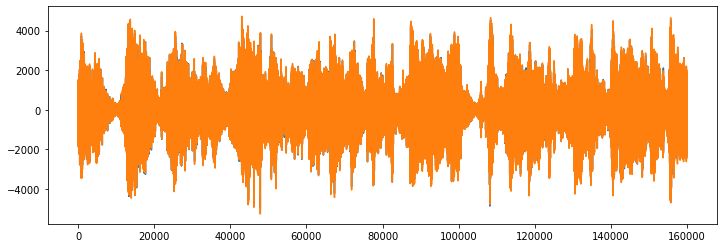

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(scipy_audio)

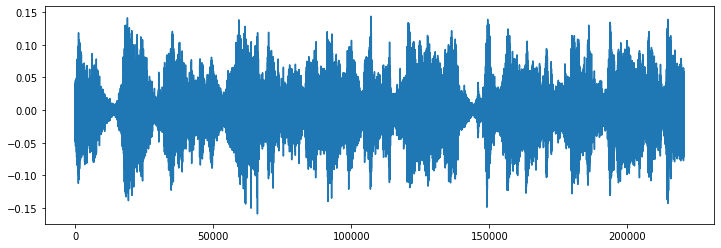

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(librosa_audio)

In [ ]:
mfccs = librosa.feature.mfcc(y=librosa_audio, sr=librosa_sample_rate, n_mfcc = 500)

In [ ]:
print(mfccs.shape)

(128, 431)


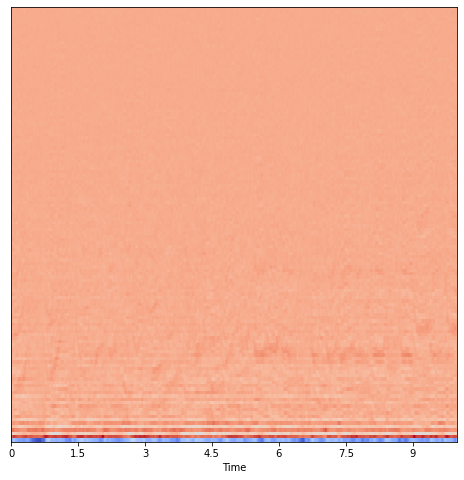

In [ ]:
import librosa.display
plt.figure(figsize=(8,8))

librosa.display.specshow(mfccs, sr=librosa_sample_rate, x_axis='time')

In [ ]:
def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=100)
    mfccs_processed = np.mean(mfccs.T,axis=0) 
    return mfccs_processed

In [ ]:
features = []
# Iterate through each sound file and extract the features 
for index, row in df.iterrows():
    file_name = row['relative_path']
    # os.path.join(os.path.abspath(fulldatasetpath),'fold'+str(row["fold"])+'/',str(row["slice_file_name"])) 
    class_label = row["Class"]
    try:
        data = extract_features(file_name)
        features.append([data, class_label])
    except:
        print("error")
        continue
# Convert into a Panda dataframe 
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

error


In [ ]:
featuresdf

,feature,class_label
0,"[-217.99413, 92.27186, -98.872826, 44.905525, ...",Clapping
1,"[-304.33163, 110.01273, -20.55195, 34.5972, -4...",Whispering
2,"[-343.70468, 124.81533, -20.576212, -11.76045,...",Whimper
3,"[-110.63257, 120.72903, -72.629524, 57.395546,...",Speech
4,"[-369.2136, 64.75474, -87.138145, 17.933197, -...",Snicker
...,...,...
7331,"[-340.72357, 157.64503, -13.948132, 45.19717, ...",Whimper
7332,"[-375.07477, 110.00922, -76.69831, 47.711235, ...",Whispering
7333,"[-129.26959, 145.92778, -25.111542, 39.862396,...",Speech
7334,"[-103.65192, 87.91234, -59.413624, 55.42095, -...",Screaming


In [ ]:
featuresdf.iloc[0]['feature']

array([-2.17994125e+02,  9.22718582e+01, -9.88728256e+01,  4.49055252e+01,
       -6.30289192e+01,  1.67560997e+01, -3.44605522e+01,  1.04214058e+01,
       -1.26060486e+01, -1.88868847e+01,  2.90642762e+00, -1.84828300e+01,
        5.43028212e+00, -1.46862650e+01,  7.18098783e+00, -8.92641830e+00,
       -3.49227846e-01, -1.44104970e+00, -2.58325076e+00,  3.65992808e+00,
       -3.85752320e+00,  4.03200865e+00, -5.86505747e+00,  1.49471629e+00,
       -2.95331812e+00,  8.98242772e-01, -2.20879531e+00, -1.92020917e+00,
       -1.38584644e-01, -2.19415021e+00,  7.26505876e-01, -3.37128830e+00,
       -8.75271782e-02, -2.31211305e+00,  8.49486887e-01, -1.24987936e+00,
        4.07844245e-01, -6.22608140e-02, -1.56017184e-01,  1.32514477e-01,
       -2.76151228e+00, -3.14852685e-01, -2.43197107e+00, -1.38354465e-01,
       -1.98818779e+00, -1.29449594e+00, -8.67196798e-01, -1.83916855e+00,
       -2.24897790e+00, -2.48364592e+00, -1.09142184e+00, -1.93433046e+00,
       -6.99235201e-01, -

In [ ]:
from sklearn.preprocessing import LabelEncoder
# from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
# Convert features and corresponding classification labels into numpy arrays
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())
# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

In [ ]:
X.shape

(7336, 100)

In [ ]:
y

array(['Clapping', 'Whispering', 'Whimper', ..., 'Speech', 'Screaming',
       'shatter'], dtype='<U17')

In [ ]:
# split the dataset 
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 127)

In [ ]:
num_labels = yy.shape[1]
filter_size = 2
def build_model_graph(input_shape=(100,)):
    model = Sequential()
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_labels))
    model.add(Activation('softmax'))
    # Compile the model
    model.compile(loss='categorical_crossentropy', metrics=['accuracy','AUC'], optimizer='adam')
    return model
model = build_model_graph()

In [ ]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 
num_epochs = 100
num_batch_size = 32
model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), verbose=1)

COMET INFO: Ignoring automatic log_parameter('verbose') because 'keras:verbose' is in COMET_LOGGING_PARAMETERS_IGNORE


Epoch 1/100
184/184 [==============================] - 2s 8ms/step - loss: 10.4209 - accuracy: 0.1167 - auc: 0.5770 - val_loss: 2.8774 - val_accuracy: 0.1567 - val_auc: 0.7167
Epoch 2/100
184/184 [==============================] - 1s 5ms/step - loss: 2.9736 - accuracy: 0.1651 - auc: 0.6569 - val_loss: 2.7646 - val_accuracy: 0.1887 - val_auc: 0.7615
Epoch 3/100
184/184 [==============================] - 1s 6ms/step - loss: 2.7840 - accuracy: 0.1996 - auc: 0.7112 - val_loss: 2.6400 - val_accuracy: 0.2255 - val_auc: 0.7801
Epoch 4/100
184/184 [==============================] - 1s 6ms/step - loss: 2.6398 - accuracy: 0.2028 - auc: 0.7498 - val_loss: 2.4756 - val_accuracy: 0.2289 - val_auc: 0.8050
Epoch 5/100
184/184 [==============================] - 1s 6ms/step - loss: 2.5496 - accuracy: 0.2227 - auc: 0.7692 - val_loss: 2.3542 - val_accuracy: 0.2391 - val_auc: 0.8147
Epoch 6/100
184/184 [==============================] - 1s 7ms/step - loss: 2.4871 - accuracy: 0.2232 - auc: 0.7843 - val_los

In [ ]:
output = model.predict(x_test)

In [ ]:
output[1]

array([0.09270255, 0.00357445, 0.00381147, 0.04066744, 0.01809201,
       0.04690446, 0.08735111, 0.00924111, 0.06517857, 0.03880147,
       0.03369312, 0.11907522, 0.03175681, 0.01211692, 0.28979492,
       0.05630274, 0.03835385, 0.00633532, 0.00624646], dtype=float32)

In [ ]:
# Evaluating the model on the training and testing set
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: {0:.2%}".format(score[1]))
score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: {0:.2%}".format(score[1]))

Training Accuracy: 51.21%
Testing Accuracy: 36.44%


In [ ]:
fn = 'Test/dv_test_1-[AudioTrimmer.com].wav'
librosa_audio, librosa_sample_rate = librosa.load(fn)
scipy_sample_rate, scipy_audio = wav.read(fn)
print("Original sample rate: {}".format(scipy_sample_rate))
print("Librosa sample rate: {}".format(librosa_sample_rate))

Original sample rate: 44100
Librosa sample rate: 22050


In [ ]:
print('Original audio file min~max range: {} to {}'.format(np.min(scipy_audio), np.max(scipy_audio)))
print('Librosa audio file min~max range: {0:.2f} to {0:.2f}'.format(np.min(librosa_audio), np.max(librosa_audio)))

Original audio file min~max range: -10497 to 10629
Librosa audio file min~max range: -0.25 to -0.25


In [ ]:
mfccs = librosa.feature.mfcc(y=librosa_audio, sr=librosa_sample_rate, n_mfcc = 100)

In [ ]:
mfccs.shape

(100, 3116)

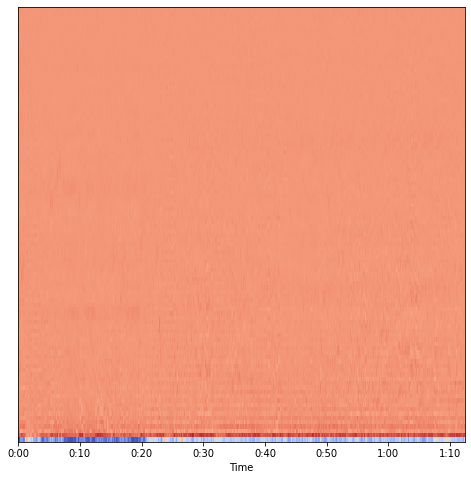

In [ ]:
import librosa.display
plt.figure(figsize=(8,8))

librosa.display.specshow(mfccs, sr=librosa_sample_rate, x_axis='time')

In [ ]:
mfccs_processed = np.mean(mfccs.T,axis=0)

In [ ]:
mfccs_processed

array([-3.5428116e+02,  1.0043304e+02,  3.7815647e+00,  2.6591024e+01,
        6.7473297e+00,  1.4398628e+01, -1.6803311e+00,  7.8047161e+00,
        4.6000943e-01,  4.8551879e+00, -1.0996929e-01,  5.8239813e+00,
        3.5230854e-01,  4.6289320e+00,  3.9206704e-01,  3.4700875e+00,
        9.3890041e-01,  3.1523869e+00, -6.1137086e-01,  1.5630028e+00,
       -4.3711072e-01,  2.2856452e+00, -7.5055474e-01, -2.0804174e-01,
       -2.1168647e+00,  5.1132917e-01, -1.8325609e+00,  6.3369405e-01,
       -9.0112585e-01,  1.1527293e+00, -5.2314895e-01,  1.4939402e+00,
       -3.3133018e-01,  6.8298358e-01, -1.4745341e-01,  1.3305136e+00,
       -9.0842992e-02,  8.3173523e-03, -2.0241816e+00, -1.1658218e+00,
       -1.1992154e+00,  3.3290029e-01, -1.6634412e+00, -1.0936072e+00,
       -1.7619939e+00, -2.2057739e-01, -1.0082159e+00, -3.4676087e-01,
       -1.8426174e+00, -1.3083518e+00, -1.9708796e+00, -1.0640537e+00,
       -2.0740361e+00, -1.6954092e+00, -2.3442700e+00, -9.5806080e-01,
      

In [ ]:
X = np.array(mfccs_processed.tolist())

In [ ]:
X.shape

(100,)

In [ ]:
X

array([-3.54281158e+02,  1.00433037e+02,  3.78156471e+00,  2.65910244e+01,
        6.74732971e+00,  1.43986282e+01, -1.68033111e+00,  7.80471611e+00,
        4.60009426e-01,  4.85518789e+00, -1.09969288e-01,  5.82398129e+00,
        3.52308542e-01,  4.62893200e+00,  3.92067045e-01,  3.47008753e+00,
        9.38900411e-01,  3.15238690e+00, -6.11370862e-01,  1.56300282e+00,
       -4.37110722e-01,  2.28564525e+00, -7.50554740e-01, -2.08041742e-01,
       -2.11686468e+00,  5.11329174e-01, -1.83256090e+00,  6.33694053e-01,
       -9.01125848e-01,  1.15272927e+00, -5.23148954e-01,  1.49394023e+00,
       -3.31330180e-01,  6.82983577e-01, -1.47453412e-01,  1.33051360e+00,
       -9.08429921e-02,  8.31735227e-03, -2.02418160e+00, -1.16582179e+00,
       -1.19921541e+00,  3.32900286e-01, -1.66344118e+00, -1.09360719e+00,
       -1.76199389e+00, -2.20577389e-01, -1.00821590e+00, -3.46760869e-01,
       -1.84261739e+00, -1.30835176e+00, -1.97087955e+00, -1.06405365e+00,
       -2.07403612e+00, -

In [ ]:
x=np.reshape(X,(-1,100))

In [ ]:
x.shape

(1, 100)

In [ ]:
x

array([[-3.54281158e+02,  1.00433037e+02,  3.78156471e+00,
         2.65910244e+01,  6.74732971e+00,  1.43986282e+01,
        -1.68033111e+00,  7.80471611e+00,  4.60009426e-01,
         4.85518789e+00, -1.09969288e-01,  5.82398129e+00,
         3.52308542e-01,  4.62893200e+00,  3.92067045e-01,
         3.47008753e+00,  9.38900411e-01,  3.15238690e+00,
        -6.11370862e-01,  1.56300282e+00, -4.37110722e-01,
         2.28564525e+00, -7.50554740e-01, -2.08041742e-01,
        -2.11686468e+00,  5.11329174e-01, -1.83256090e+00,
         6.33694053e-01, -9.01125848e-01,  1.15272927e+00,
        -5.23148954e-01,  1.49394023e+00, -3.31330180e-01,
         6.82983577e-01, -1.47453412e-01,  1.33051360e+00,
        -9.08429921e-02,  8.31735227e-03, -2.02418160e+00,
        -1.16582179e+00, -1.19921541e+00,  3.32900286e-01,
        -1.66344118e+00, -1.09360719e+00, -1.76199389e+00,
        -2.20577389e-01, -1.00821590e+00, -3.46760869e-01,
        -1.84261739e+00, -1.30835176e+00, -1.97087955e+0

In [148]:
output = model.predict(x)

In [149]:
output

array([[4.9810722e-02, 3.0387417e-07, 2.0278248e-03, 7.9795808e-02,
        3.8860376e-06, 5.5100406e-03, 1.7756605e-01, 6.7864638e-03,
        4.1970018e-02, 9.5212515e-03, 6.4140512e-03, 2.4888221e-02,
        7.9712428e-02, 6.2816520e-03, 2.0716155e-01, 2.3983176e-01,
        6.5902271e-03, 3.7702051e-05, 5.6090102e-02]], dtype=float32)

In [150]:
output.max()

0.23983176

In [153]:
def top5Classes(output):
    #sort output descending
    output_sorted = np.sort(output, axis=1)[:,::-1]
    #first 5 elements of the output
    output_sorted = output_sorted[:,:5]
    #convert output_sorted to 1D array
    output_sorted = np.reshape(output_sorted, -1)
    #convert output_sorted to list
    output_sorted = output_sorted.tolist()
    output= np.reshape(output, -1)
    output = output.tolist()
    index = []
    for i in output_sorted:
        if i in output:
            index.append(output.index(i))
    class_name = [name for name in os.listdir(".") if os.path.isdir(name)]
    class_name.remove('Test')
    class_name.remove('.git')
    for i in index:
        print(class_name[i])

In [154]:
top5Classes(output)

Whimper
Wail, moan
Conversation
Breathing
Snicker


In [155]:
fn = 'Test/test_2-[AudioTrimmer.com].wav'
librosa_audio, librosa_sample_rate = librosa.load(fn)
scipy_sample_rate, scipy_audio = wav.read(fn)
print("Original sample rate: {}".format(scipy_sample_rate))
print("Librosa sample rate: {}".format(librosa_sample_rate))

Original sample rate: 44100
Librosa sample rate: 22050


In [156]:
mfccs = librosa.feature.mfcc(y=librosa_audio, sr=librosa_sample_rate, n_mfcc = 100)

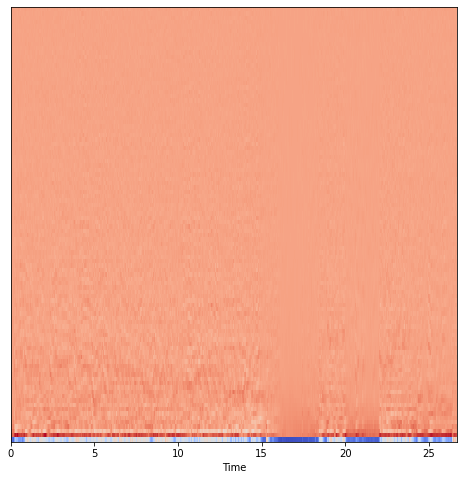

In [157]:
import librosa.display
plt.figure(figsize=(8,8))

librosa.display.specshow(mfccs, sr=librosa_sample_rate, x_axis='time')

In [158]:
mfccs_processed = np.mean(mfccs.T,axis=0)

In [159]:
X = np.array(mfccs_processed.tolist())
x=np.reshape(X,(-1,100))

In [160]:
output = model.predict(x)

In [161]:
output

array([[5.4142367e-02, 4.4523290e-06, 1.9008917e-03, 8.0004580e-02,
        2.6140289e-04, 3.2236796e-02, 3.8830288e-02, 5.0515000e-04,
        7.5673841e-02, 4.9902145e-02, 5.9435931e-03, 3.5848439e-02,
        3.7267573e-02, 7.5995219e-03, 2.9767394e-01, 2.2745082e-01,
        7.6839910e-03, 6.3427835e-04, 4.6435937e-02]], dtype=float32)

In [162]:
output.max()

0.29767394

In [163]:
top5Classes(output)

Wail, moan
Whimper
Breathing
Groan
Babbling
